# Visualizations

In [28]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import patsy
import seaborn as sns
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from scipy import stats
import pickle
import json

from statsmodels.stats.outliers_influence import OLSInfluence

In [4]:
# Import cleaned and formated data ELSI and US News data

with open('../data/processed/0215_model_ready.pkl', 'rb') as picklefile: 
    df_model = pickle.load(picklefile)
print(df_model.shape)
df_model.head()

(1357, 24)


,college_readiness,total_students_calc,pupil_teacher_ratio,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,pct_hispanic,charter_school_2-No,magnet_school_2-No,...,urban_centric_locale_13-City: Small,urban_centric_locale_21-Suburb: Large,urban_centric_locale_22-Suburb: Mid-size,urban_centric_locale_23-Suburb: Small,urban_centric_locale_31-Town: Fringe,urban_centric_locale_32-Town: Distant,urban_centric_locale_33-Town: Remote,urban_centric_locale_41-Rural: Fringe,urban_centric_locale_42-Rural: Distant,urban_centric_locale_43-Rural: Remote
0,40.9,1687,20.08,0.346177,0.085359,0.808536,0.087730,0.046829,1,1,...,0,0,1,0,0,0,0,0,0,0
1,28.6,1444,15.01,0.354571,0.086565,0.427978,0.348338,0.081025,1,0,...,0,0,1,0,0,0,0,0,0,0
2,35.1,1034,13.29,0.102515,0.020309,0.907157,0.018375,0.020309,1,1,...,0,0,0,0,0,0,0,1,0,0
3,33.0,1743,14.48,0.154332,0.023523,0.647160,0.232358,0.055077,1,1,...,0,1,0,0,0,0,0,0,0,0
4,47.1,1851,23.15,0.438142,0.097245,0.154511,0.041059,0.717450,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
with open('../data/processed/0215_all_features_cleaned.pkl', 'rb') as picklefile: 
    df = pickle.load(picklefile)
print(df.shape)
df.head()

(1368, 51)


,district,college_readiness,school_name_x,city_x,state_x,graduation_rate,school_id,state_name,agency_id,county_name,...,hawaiian_nat_pacific_isl_students,two_or_more_races_students,male_students,female_students,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,pct_hispanic,total_students_calc
0,Bay,40.9,A. Crawford Mosley High School,Lynn Haven,FL,82.0,120009000067,Florida,1200090,BAY COUNTY,...,2,64,844,843,0.346177,0.085359,0.808536,0.087730,0.046829,1687
1,Harford County Public Schools,28.6,Aberdeen High,Aberdeen,MD,87.0,240039000679,Maryland,2400390,HARFORD COUNTY,...,6,130,779,665,0.354571,0.086565,0.427978,0.348338,0.081025,1444
2,Abington Heights SD,35.1,Abington Heights High School,Clarks Summit,PA,93.0,420201005091,Pennsylvania,4202010,LACKAWANNA COUNTY,...,0,7,542,492,0.102515,0.020309,0.907157,0.018375,0.020309,1034
3,Abington SD,33.0,Abington High School,Abington,PA,93.0,420204003241,Pennsylvania,4202040,MONTGOMERY COUNTY,...,3,32,920,823,0.154332,0.023523,0.647160,0.232358,0.055077,1743
4,San Jose Unified School District,47.1,Abraham Lincoln High,San Jose,CA,94.0,"=""063459005696""",California,"=""0634590""",SANTA CLARA COUNTY,...,7,32,899,952,0.438142,0.097245,0.154511,0.041059,0.717450,1851


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 0 to 1367
Data columns (total 51 columns):
district                                 1368 non-null object
college_readiness                        1368 non-null float64
school_name_x                            1368 non-null object
city_x                                   1368 non-null object
state_x                                  1368 non-null object
graduation_rate                          1365 non-null float64
school_id                                1368 non-null object
state_name                               1368 non-null object
agency_id                                1368 non-null object
county_name                              1368 non-null object
fips_state_code                          1368 non-null object
charter_school                           1308 non-null object
magnet_school                            1265 non-null object
shared_time_school                       1368 non-null object
urban_centric_locale   

In [7]:
df.groupby('urban_centric_locale')['college_readiness'].mean().to_csv('school_locale.csv')

In [10]:
sorted_df = df.sort_values('urban_centric_locale')
sorted_df

,district,college_readiness,school_name_x,city_x,state_x,graduation_rate,school_id,state_name,agency_id,county_name,...,hawaiian_nat_pacific_isl_students,two_or_more_races_students,male_students,female_students,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,pct_hispanic,total_students_calc
1042,Los Angeles Unified School District,27.8,Birmingham Community Charter High,Van Nuys,CA,88.0,"=""062271002857""",California,"=""0622710""",LOS ANGELES COUNTY,...,5,23,1725,1544,0.652493,0.161823,0.079535,0.055369,0.815234,3269
802,New York City Public Schools,43.8,Manhattan Center for Science and Mathematics,New York,NY,94.0,360007904518,New York,3600079,NEW YORK COUNTY,...,0,18,822,780,0.715356,0.085518,0.041823,0.209114,0.539950,1602
801,New York City Public Schools,76.9,Manhattan Bridges High School,New York,NY,84.0,360007705500,New York,3600077,NEW YORK COUNTY,...,0,0,259,272,0.721281,0.005650,0.000000,0.000000,1.000000,531
1274,New York City Public Schools,22.1,Manhattan International High School,New York,NY,71.0,360007700586,New York,3600077,NEW YORK COUNTY,...,0,1,174,170,0.558140,0.011628,0.125000,0.165698,0.409884,344
269,Chicago Public Schools,34.7,Chicago High School for the Arts,Chicago,IL,88.0,170993006058,Illinois,1709930,COOK COUNTY,...,2,21,205,371,0.567708,0.000000,0.154514,0.541667,0.241319,576
276,San Diego Unified School District,35.8,Clairemont High,San Diego,CA,89.0,"=""063432005434""",California,"=""0634320""",SAN DIEGO COUNTY,...,3,47,543,524,0.452671,0.118088,0.329897,0.028116,0.522962,1067
1038,Los Angeles Unified School District,25.4,Belmont Senior High,Los Angeles,CA,78.0,"=""062271007751""",California,"=""0622710""",LOS ANGELES COUNTY,...,0,5,547,431,0.795501,0.012270,0.009202,0.020450,0.895706,978
1040,Portland SD 1j,20.5,Benson Polytechnic High School,Portland,OR,85.0,411004000956,Oregon,4110040,MULTNOMAH COUNTY,...,7,59,500,379,0.617747,0.095563,0.303754,0.211604,0.255973,879
783,Fremont Union High,78.7,Lynbrook High,San Jose,CA,98.0,"=""061443001698""",California,"=""0614430""",SANTA CLARA COUNTY,...,2,71,949,904,0.039396,0.008635,0.115488,0.004317,0.030761,1853
288,Clovis Unified,46.4,Clovis North High,Fresno,CA,98.0,"=""060903011855""",California,"=""0609030""",FRESNO COUNTY,...,5,84,1198,1145,0.122066,0.044388,0.521127,0.033291,0.218096,2343


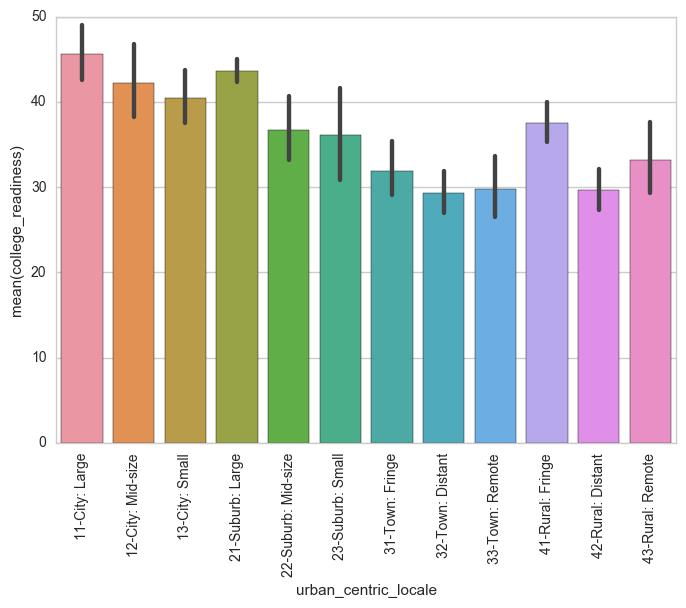

In [13]:
sns.set_style("whitegrid")
ax = sns.barplot(x="urban_centric_locale", y="college_readiness", data=df.sort_values('urban_centric_locale'))
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [18]:
df['college_readiness'].describe()

count    1368.000000
mean       40.616009
std        16.822599
min        20.200000
25%        27.300000
50%        36.100000
75%        49.925000
max       100.000000
Name: college_readiness, dtype: float64

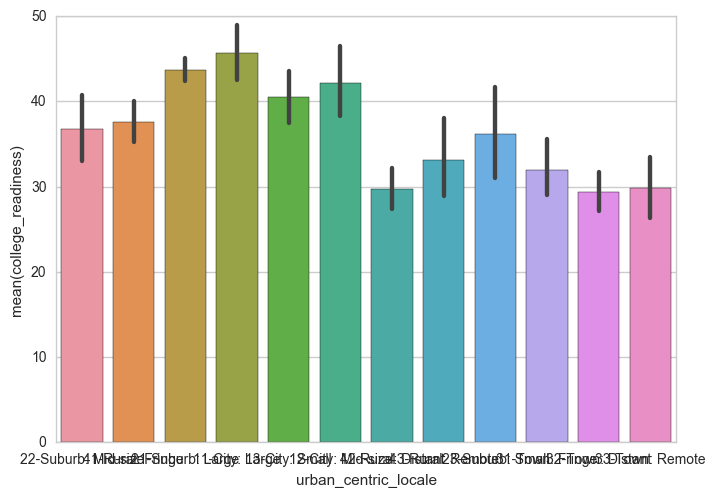

In [14]:
ax = sns.barplot(x="urban_centric_locale", y="college_readiness", data=df)

In [15]:
def create_barchart_json(labels, data, background_colors, border_colors):
    """
    Parameters should be arrays. Example of color formats:
    backgroundColor: [
        'rgba(255, 99, 132, 0.2)',
        'rgba(54, 162, 235, 0.2)',
        'rgba(255, 206, 86, 0.2)',
        'rgba(75, 192, 192, 0.2)',
        'rgba(153, 102, 255, 0.2)',
        'rgba(255, 159, 64, 0.2)'
    ],
    borderColor: [
        'rgba(255,99,132,1)',
        'rgba(54, 162, 235, 1)',
        'rgba(255, 206, 86, 1)',
        'rgba(75, 192, 192, 1)',
        'rgba(153, 102, 255, 1)',
        'rgba(255, 159, 64, 1)'
    ],
    """
    data = {
        'labels': labels,
        'datasets': [
            {
                'label': "My First dataset",
                'backgroundColor': background_colors,
                'borderColor': border_colors,
                'borderWidth': 1,
                'data': data,
            }
        ]
    }
    return data

In [22]:
grouped_df = df.groupby('urban_centric_locale', as_index=False).mean().copy(deep=True)
grouped_df

,urban_centric_locale,college_readiness,graduation_rate,longitude,latitude,total_students_all_grades_excl_ae,total_students_all_grades_incl_ae,free_lunch_eligible,reduced_price_lunch_eligible_students,pupil_teacher_ratio,...,hawaiian_nat_pacific_isl_students,two_or_more_races_students,male_students,female_students,pct_eligible_for_free_lunch,pct_eligible_for_reduced_lunch,pct_white,pct_black,pct_hispanic,total_students_calc
0,11-City: Large,45.652778,91.722222,-96.533702,37.443569,1392.816667,1392.816667,646.538889,105.600000,20.732290,...,4.216667,35.300000,656.833333,689.094444,0.507183,0.074054,0.236212,0.196735,0.391746,1345.927778
1,12-City: Mid-size,42.206452,94.306452,-98.318119,36.592929,1466.532258,1466.532258,402.661290,83.580645,20.238635,...,3.467742,45.241935,692.935484,695.387097,0.324820,0.065705,0.490740,0.166908,0.217044,1388.322581
2,13-City: Small,40.454237,91.618644,-92.589887,38.354868,1546.737288,1546.737288,395.788136,73.957627,18.195741,...,3.677966,42.847458,760.211864,740.372881,0.268889,0.057317,0.573907,0.120569,0.154336,1500.584746
3,21-Suburb: Large,43.654561,94.040609,-90.483695,37.815791,1584.734797,1584.734797,372.923986,84.052365,18.672498,...,4.969595,43.172297,777.425676,757.565878,0.240944,0.058058,0.580395,0.081464,0.211889,1534.991554
4,22-Suburb: Mid-size,36.727907,91.976744,-86.930801,38.671115,1180.209302,1180.209302,261.930233,60.325581,17.479443,...,1.604651,39.046512,576.441860,551.279070,0.227015,0.071997,0.731182,0.070165,0.121028,1127.720930
5,23-Suburb: Small,36.143478,92.782609,-95.958826,39.792528,1099.782609,1099.782609,305.304348,73.086957,19.290729,...,2.521739,24.913043,557.000000,532.304348,0.283847,0.065289,0.736948,0.022112,0.158659,1089.304348
6,31-Town: Fringe,31.957895,93.526316,-92.523902,41.352766,776.157895,776.157895,173.157895,39.578947,17.604144,...,1.026316,21.184211,393.500000,376.000000,0.269815,0.067983,0.751737,0.027910,0.171248,769.500000
7,32-Town: Distant,29.367925,91.245283,-89.117493,40.295969,758.943396,759.018868,238.018868,45.169811,16.117944,...,1.377358,13.849057,373.584906,353.981132,0.351507,0.084483,0.752986,0.053244,0.148675,727.566038
8,33-Town: Remote,29.792593,89.230769,-100.253177,42.453614,807.740741,807.740741,273.185185,56.185185,18.104815,...,1.888889,20.185185,411.185185,402.481481,0.342922,0.062832,0.720169,0.026522,0.154382,813.666667
9,41-Rural: Fringe,37.584138,93.262069,-87.464396,38.896732,1106.241379,1106.241379,193.703448,52.337931,18.524187,...,2.282759,29.213793,543.068966,521.731034,0.202885,0.054794,0.756376,0.070691,0.101775,1064.800000


In [34]:
sorted_df = grouped_df.sort_values('urban_centric_locale')
background_colors = ['rgba(255, 99, 132, 0.2)',\
         'rgba(255, 99, 132, 0.2)',\
         'rgba(255, 99, 132, 0.2)',\
         'rgba(255, 99, 132, 0.2)',\
         'rgba(54, 162, 235, 0.2)',\
         'rgba(54, 162, 235, 0.2)',\
         'rgba(54, 162, 235, 0.2)',\
         'rgba(54, 162, 235, 0.2)',\
         'rgba(255, 206, 86, 0.2)',\
         'rgba(255, 206, 86, 0.2)',\
         'rgba(255, 206, 86, 0.2)',\
         'rgba(255, 206, 86, 0.2)']
border_colors = ['rgba(255,99,132,1)',\
         'rgba(255,99,132,1)',\
         'rgba(255,99,132,1)',\
         'rgba(255,99,132,1)',\
         'rgba(54, 162, 235, 1)',\
         'rgba(54, 162, 235, 1)',\
         'rgba(54, 162, 235, 1)',\
         'rgba(54, 162, 235, 1)',\
         'rgba(255, 206, 86, 1)',\
         'rgba(255, 206, 86, 1)',\
         'rgba(255, 206, 86, 1)',\
         'rgba(255, 206, 86, 1)']
barchart_dict = create_barchart_json(sorted_df['urban_centric_locale'].values.tolist(), sorted_df['college_readiness'].values.round(2).tolist(), background_colors, border_colors)
barchart_dict

{'datasets': [{'backgroundColor': ['rgba(255, 99, 132, 0.2)',
    'rgba(255, 99, 132, 0.2)',
    'rgba(255, 99, 132, 0.2)',
    'rgba(255, 99, 132, 0.2)',
    'rgba(54, 162, 235, 0.2)',
    'rgba(54, 162, 235, 0.2)',
    'rgba(54, 162, 235, 0.2)',
    'rgba(54, 162, 235, 0.2)',
    'rgba(255, 206, 86, 0.2)',
    'rgba(255, 206, 86, 0.2)',
    'rgba(255, 206, 86, 0.2)',
    'rgba(255, 206, 86, 0.2)'],
   'borderColor': ['rgba(255,99,132,1)',
    'rgba(255,99,132,1)',
    'rgba(255,99,132,1)',
    'rgba(255,99,132,1)',
    'rgba(54, 162, 235, 1)',
    'rgba(54, 162, 235, 1)',
    'rgba(54, 162, 235, 1)',
    'rgba(54, 162, 235, 1)',
    'rgba(255, 206, 86, 1)',
    'rgba(255, 206, 86, 1)',
    'rgba(255, 206, 86, 1)',
    'rgba(255, 206, 86, 1)'],
   'borderWidth': 1,
   'data': [45.65,
    42.21,
    40.45,
    43.65,
    36.73,
    36.14,
    31.96,
    29.37,
    29.79,
    37.58,
    29.67,
    33.16],
   'label': 'My First dataset'}],
 'labels': ['11-City: Large',
  '12-City: Mid-si

In [35]:
barchart_json = json.dumps(barchart_dict)
barchart_json

'{"labels": ["11-City: Large", "12-City: Mid-size", "13-City: Small", "21-Suburb: Large", "22-Suburb: Mid-size", "23-Suburb: Small", "31-Town: Fringe", "32-Town: Distant", "33-Town: Remote", "41-Rural: Fringe", "42-Rural: Distant", "43-Rural: Remote"], "datasets": [{"borderColor": ["rgba(255,99,132,1)", "rgba(255,99,132,1)", "rgba(255,99,132,1)", "rgba(255,99,132,1)", "rgba(54, 162, 235, 1)", "rgba(54, 162, 235, 1)", "rgba(54, 162, 235, 1)", "rgba(54, 162, 235, 1)", "rgba(255, 206, 86, 1)", "rgba(255, 206, 86, 1)", "rgba(255, 206, 86, 1)", "rgba(255, 206, 86, 1)"], "data": [45.65, 42.21, 40.45, 43.65, 36.73, 36.14, 31.96, 29.37, 29.79, 37.58, 29.67, 33.16], "backgroundColor": ["rgba(255, 99, 132, 0.2)", "rgba(255, 99, 132, 0.2)", "rgba(255, 99, 132, 0.2)", "rgba(255, 99, 132, 0.2)", "rgba(54, 162, 235, 0.2)", "rgba(54, 162, 235, 0.2)", "rgba(54, 162, 235, 0.2)", "rgba(54, 162, 235, 0.2)", "rgba(255, 206, 86, 0.2)", "rgba(255, 206, 86, 0.2)", "rgba(255, 206, 86, 0.2)", "rgba(255, 206, 8

In [36]:
with open('barchart.json', 'w') as outfile:
    json.dump(barchart_json, outfile)